# Chicago Crime Analysis and Prediction

Every day, thousands of crimes happen in the major cities of the United States. Crimes could be of any type - Criminal or non-criminal. Chicago is one of the leading cities in experiencing crimes. According to FBI reports, Chicago has more than quadruple the amount of crimes in New York City and more than twice the amount of crimes in Los Angeles. Crime reported is accounted but the huge amount of this data is a problem that impedes the police department to understand the patterns and types of crimes in the city of Chicago. Data analytics can be the key to understand these crimes and the department can take necessary actions to decrease the crime rate.

In this project, I will be majorly focusing on exploring the crime related data of Chicago. While analyzing I will try to answer some reseach questions which could help in understanding the trend of crimes happening in the city. Some of the questions are as follows:
1. What is the trend of the number of crimes over the years?
2. Which crimes are happening at a higher rate in the city?
3. Which community is the most affected in the city?
4. How have the number of arrests corresponded to the crimes changed over time?
5. Which crimes have increased whereas which ones have decreased over time?
6. Can we predict a certain type of crime that can be committed by studying the historic patterns of the crimes using some machine learning algorithms?

Answering these above-mentioned questions may help the police department in taking some strategic decisions.

In [36]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split #train_test_split
from sklearn import metrics #for accuracy calculation

In [28]:
# Importing python module
from Shakya_Munghate_Module import read_file, type_conv, data_preprocess, get_season, get_weekend, top3, mom, yoy, MoM_Curr,mom_prim, roll_yoy, roll_prim, arrest, comm, beat,recent_yrs, rec_crimes,  hypothesis, data_url, modeling, corr

In [ ]:
df = read_file(url)

In [6]:
#Current Year
df_current = df[df['year'] == max(df['year'])].copy()

In [26]:
type_conv(df)

data types of the columns have been converted


## Year over year Trend

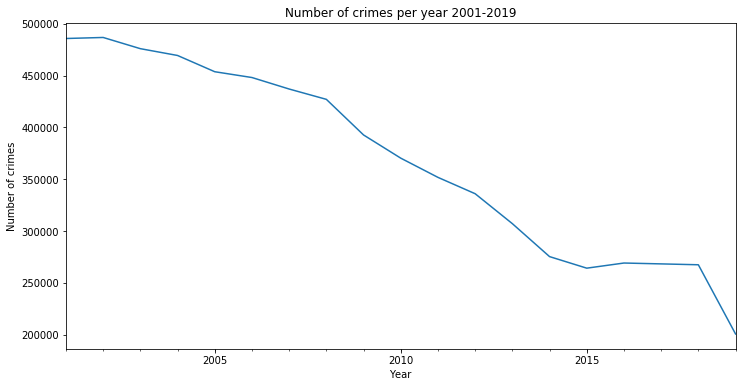

In [11]:
yoy(df)

The above figure shows the year over year trend of number of crimes that have been occured in the past till current in Chicago. Its very evident that the numbers are reducing every year and that is in the favor of the citizens that the city is comparatively safer now in 2019 when compared to 2000s. However, this could be an a very premature statement because here we do not know the type of crimes have been occuring.

## Month over month trend

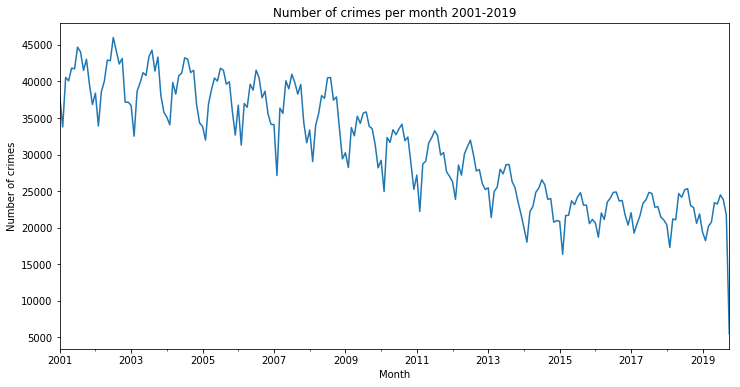

In [13]:
mom(df)

The above plot show month over month trend. We observe a very distinctive seasonality in the crime pattern in Chicago.  Every year we see dips and peaks in the number of crimes. Thus, it becomes very easy to predict that such pattern will also occur in the future years. Thus, police department can regulate their forces according after studying such patterns in crimes. However, this graph does not exactly point out which months do we see such dips and peaks. In order to understand that let's zoom in.

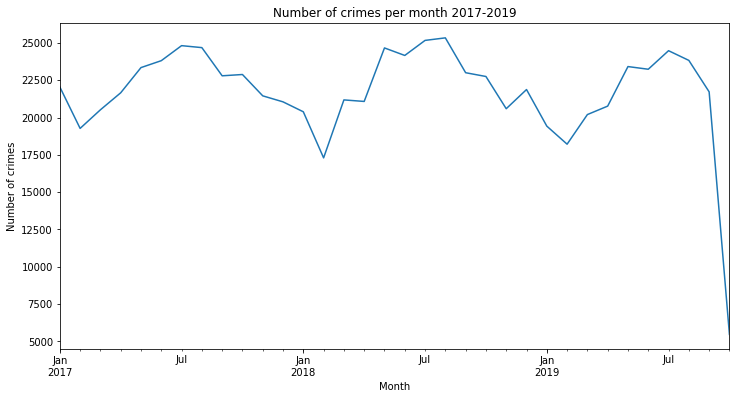

In [14]:
MoM_Curr(df)

Above plot shows that as the year progresses towards July, the number of crimes starts increasing and shoots the peak in July. Whereas, it plumets as July is passed and lowest number of crimes are observed in the month of February.  This pattern remains constant year as can be seen in the plot. Thus, police department should make a note of this and take necessary measures to control or avoid the crimes.

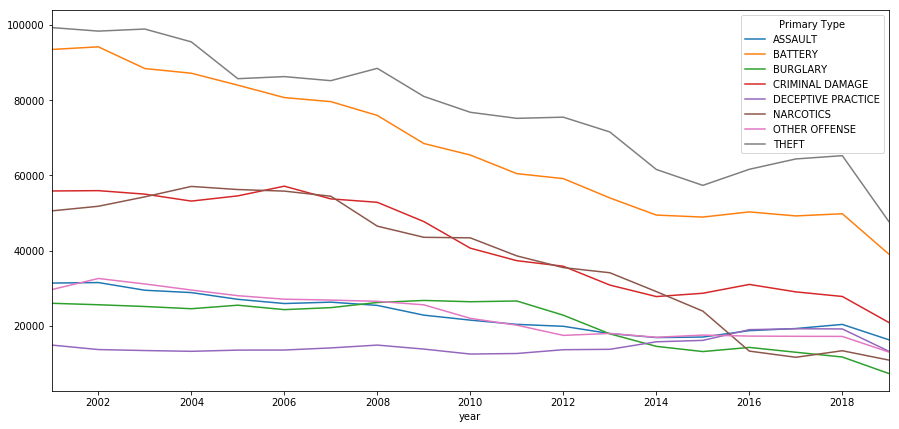

In [7]:
mom_prim(df)

The plot shows the trend of top crimes by their types over the years. Theft is at the top of the list which is followed by battery.

## Top 3 Crimes in Chicago 

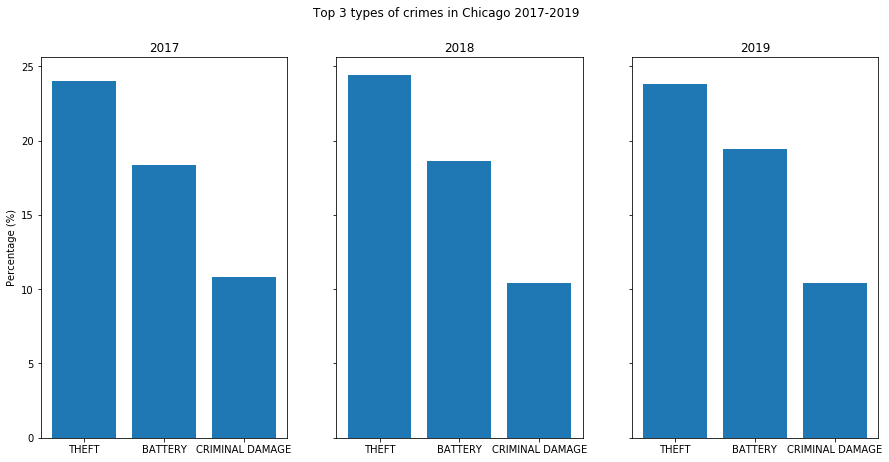

In [71]:
top3(df)

For all the years between 2017 and 2019, the top crimes were theft, battery and criminal damage, in that order. Chicago experiences extremely high number of theft activities which are reported. Nearly 25% of all the crimes in all these years individually account for Theft. Battery accounts for nearly 20% while criminal damange is around 10% of all the crimes in the city. This remains constant for every stated year.

## Rate of crimes by type

'Rolling Sum YoY'

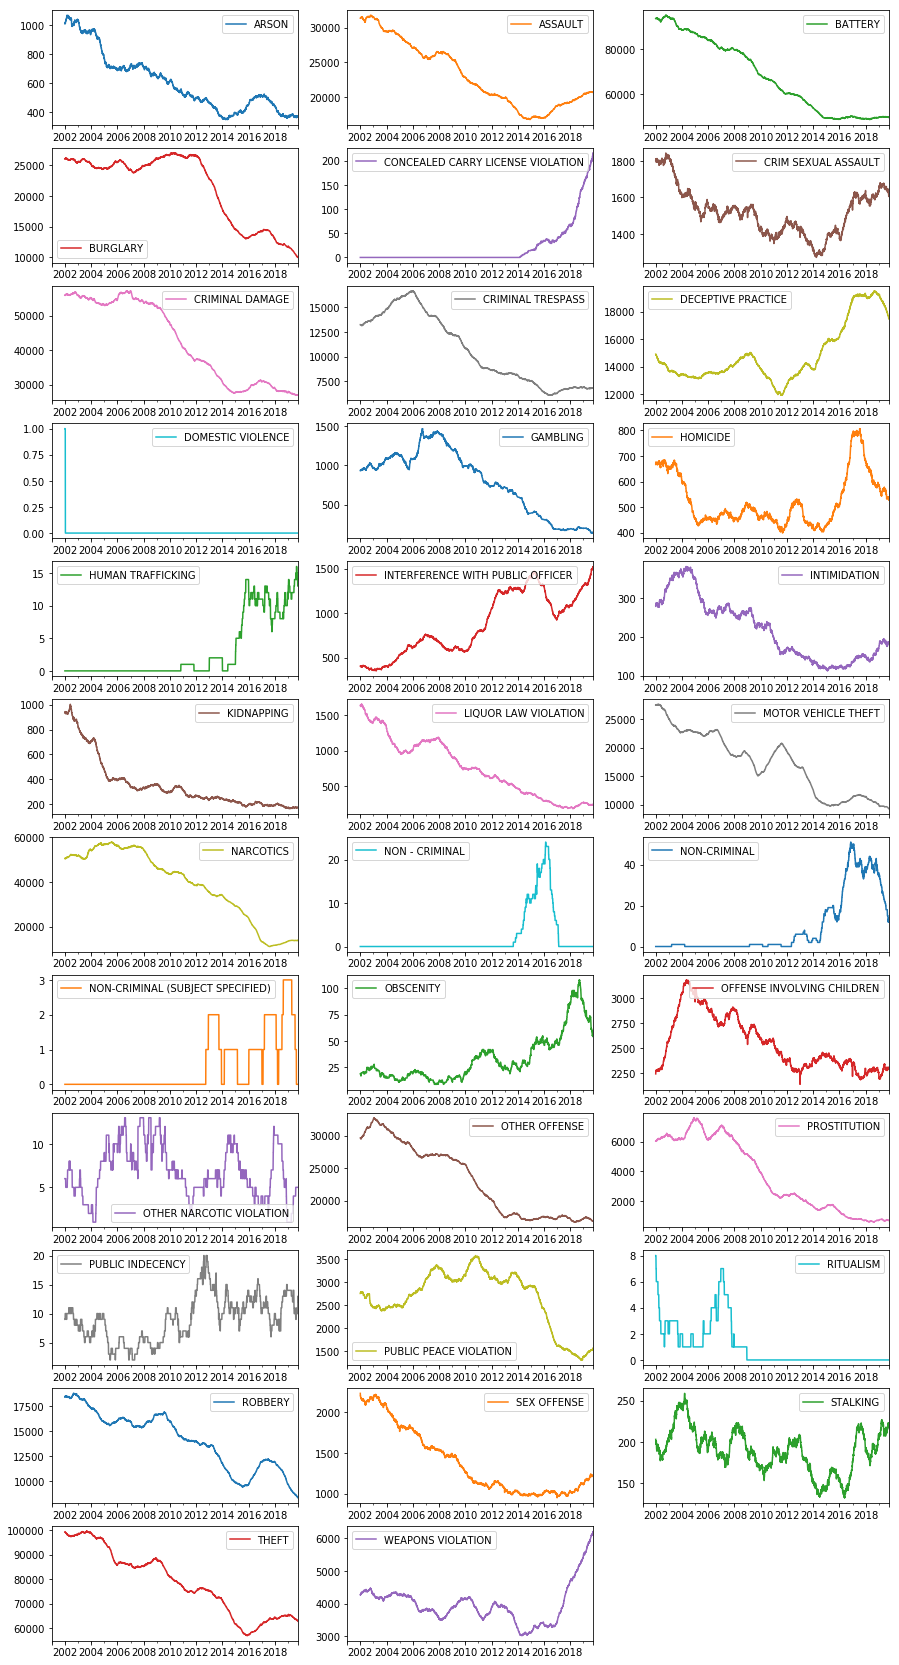

In [8]:
roll_yoy(df)

This is a very informative set of plots which shows the rolling sum of number of crimes. Rolling sum is taken of the past 1 year that is 365 days which gives the rate of change of number of crimes over the years. Let's look at some of the types of crimes which are frequently committed and the ones which are needed to be more attention. Let's look at the top three crimes - Theft, Battery and Criminal Damage. For all three of them, although the numbers are pretty high, the rate of occurance of these crimes are decreasing over the years which is actually a great news. However, what's more shocking is criminal sexual assualt, intereference with officers, weapons violation, stalking  etc are on the rise.  Some precautionary and preventive steps should be taken by the police department so that such a rise in such crimes is mitigated. 

## Police district which reported more crimes in 2019, Unsafe Communities and Beats

In [15]:
df_current.groupby(['year','Police Districts'])['ID'].count().to_frame('count')
df_current.pivot_table('ID',  aggfunc=np.size, columns='year', index = df_current['Police Districts'])

year,2019
Police Districts,
1.0,5151
2.0,3406
3.0,1
4.0,32
5.0,9019
6.0,9787
7.0,6961
9.0,6237
10.0,8672


The above table shows that in 2019, police district 14 reported the most number of crimes. This means that the communities within this police district are most unsafe for the year 2019. Later we will also see which communities specifically are the most unsafe.

In [17]:
top_comm(df)

year,Community Areas,2019
0,26.0,11293
1,37.0,9542
2,38.0,8088
3,29.0,7049
4,30.0,6878
5,39.0,6630
6,24.0,6190
7,70.0,6018
8,25.0,5535
9,67.0,5200


Above table shows the top 10 most unsafe communities in Chicago, 2019. Community number 26 is the most unsafe out of all.
Let us check in more detail about community 26

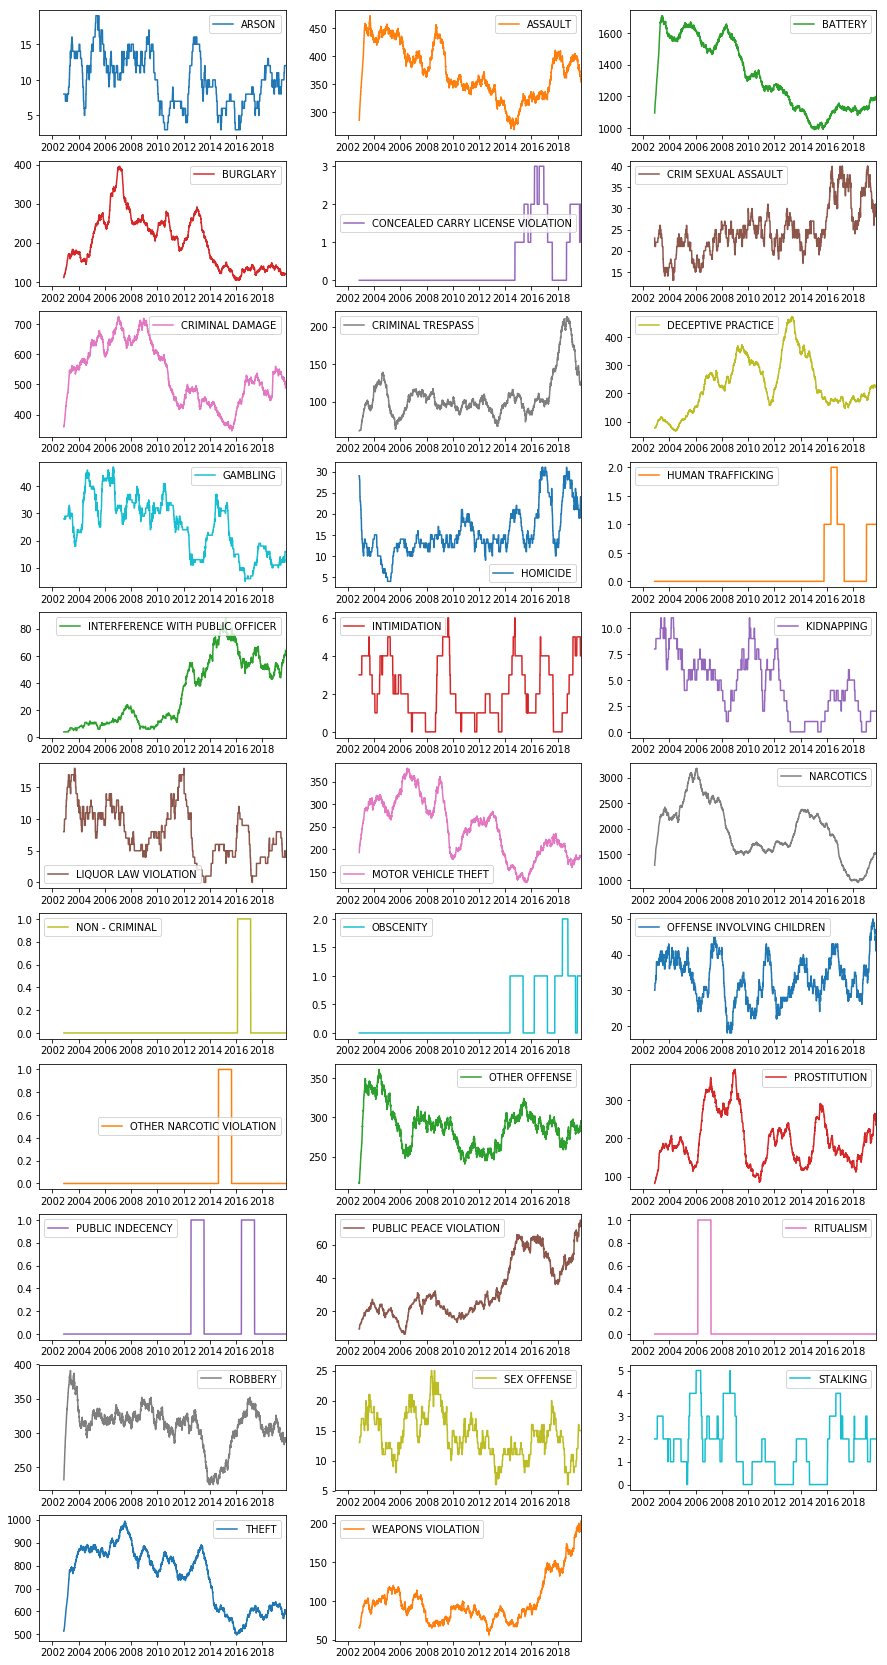

In [9]:
comm(df)

In community 26, weapon violation, public peace violation, robbery, theft, offense involving child etc are on the rise. In fact, most types of crimes are on the rise in community 26. Police Beats which supervise community 26 should take necessary measures to control such crimes. 

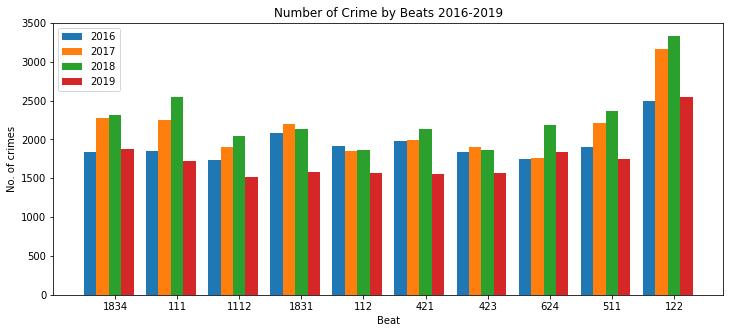

In [10]:
beat(df)

The above graph shows the number of crimes reported in top 10 beats from 2016 - 2019. As 2019 is still in progress, it should not have final number of crimes committed. Beat number 122 has been reporting the most number of crimes. After 2016, we see a sudden rise in the number of crimes which even got furthered in 2018. Similar is the case for most of the beats. However, beat number 1831, 112 have shown a slight decrease in the number of crimes.

## Hypothesis Testing

Here we have a hypothesis that during winters the number of crimes should sharply reduce when compared to rest of the seasons. Let's see if that is the case.

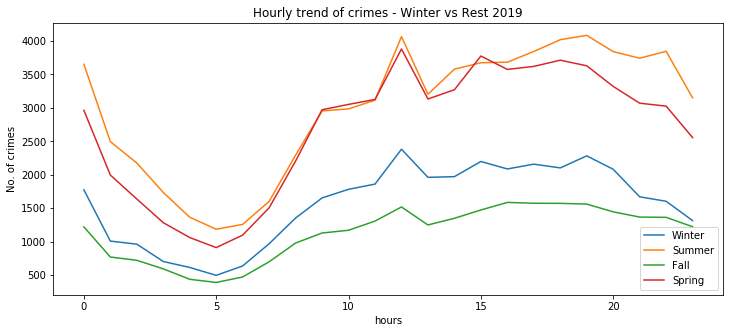

In [24]:
hypothesis(df)

The hypothesis is partially correct. Definitely the number of crimes during winter season when compared to summer and spring is much less. However, in Fall the numbers are even more lower which is strange. I earlier believed that during winters, the temperature is extremely low and thus the change of crimes is less which is not true completely.

## Prediction of type of crime

In [30]:
df_model = modeling(df)

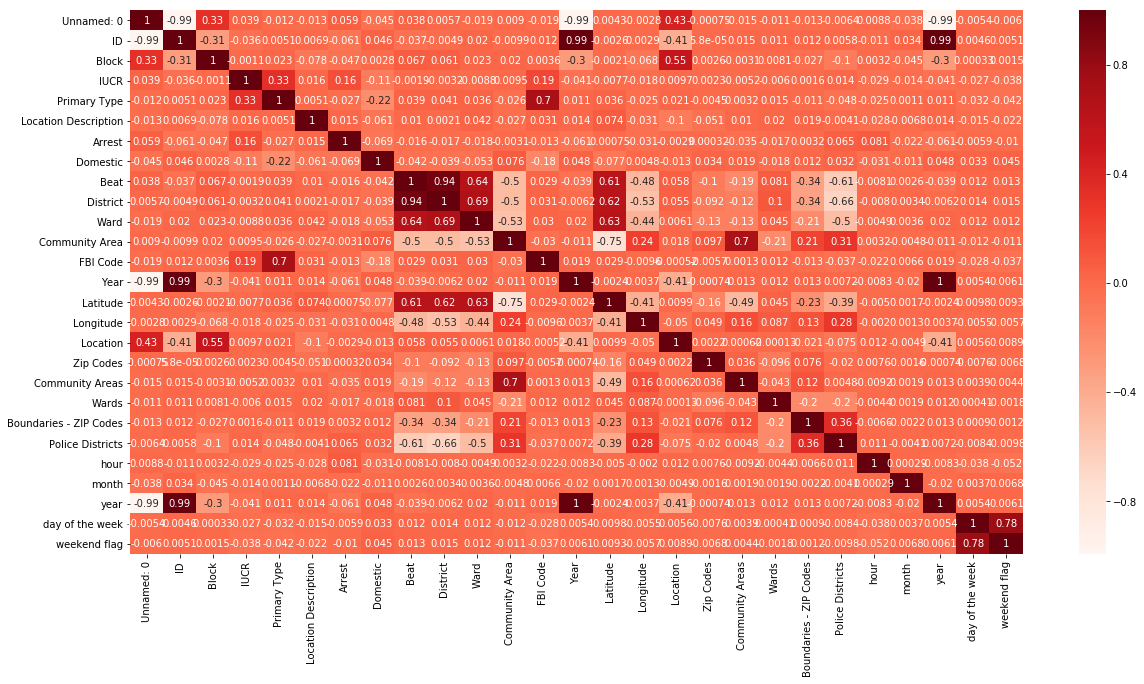

Only following are the variables (with correlation coefficient) important for modeling
IUCR        0.334419
Domestic    0.218235
Name: Primary Type, dtype: float64


In [31]:
corr(df_model)

The above graph shows the correlation plot of data. However, out of all the variables, only IUCR and Domestic seem to have absolute value of correlation coefficients between 0.2 and 0.7. We do not select variables which higher correlation coefficient because it results in hyper collinearity issues creating biases in the model.

In [37]:
#Decision Tree Regression
X = df_model[['IUCR','FBI Code','Domestic']]
y = df_model[['Primary Type']]


#Test train Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Create Decision Tree classifer object
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

#Predict
y_pred = pd.DataFrame(regressor.predict(X_test)).astype('int64')


# Model Evaluation

accuracy = metrics.accuracy_score(y_test , y_pred)*100

confusion_m = metrics.confusion_matrix(y_test , y_pred)

In [49]:
print("Accuracy: {}%".format(accuracy))

Accuracy: 99.9989982000995%


Accuracy of our prediction is nearly 100%